In [1]:
import tensorflow as tf


In [2]:
import numpy as np

In [3]:
arr = np.arange(9).reshape(3,3,1)
arr

array([[[0],
        [1],
        [2]],

       [[3],
        [4],
        [5]],

       [[6],
        [7],
        [8]]])

In [4]:
x = tf.constant(arr)
x

<tf.Tensor: shape=(3, 3, 1), dtype=int32, numpy=
array([[[0],
        [1],
        [2]],

       [[3],
        [4],
        [5]],

       [[6],
        [7],
        [8]]])>

In [5]:
x+x

<tf.Tensor: shape=(3, 3, 1), dtype=int32, numpy=
array([[[ 0],
        [ 2],
        [ 4]],

       [[ 6],
        [ 8],
        [10]],

       [[12],
        [14],
        [16]]])>

In [6]:
x*5

<tf.Tensor: shape=(3, 3, 1), dtype=int32, numpy=
array([[[ 0],
        [ 5],
        [10]],

       [[15],
        [20],
        [25]],

       [[30],
        [35],
        [40]]])>

In [7]:
5*x

<tf.Tensor: shape=(3, 3, 1), dtype=int32, numpy=
array([[[ 0],
        [ 5],
        [10]],

       [[15],
        [20],
        [25]],

       [[30],
        [35],
        [40]]])>

In [8]:
tf.transpose(x)

<tf.Tensor: shape=(1, 3, 3), dtype=int32, numpy=
array([[[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]]])>

In [9]:
tf.concat([x,x], axis=2)

<tf.Tensor: shape=(3, 3, 2), dtype=int32, numpy=
array([[[0, 0],
        [1, 1],
        [2, 2]],

       [[3, 3],
        [4, 4],
        [5, 5]],

       [[6, 6],
        [7, 7],
        [8, 8]]])>

In [10]:
x[:,1,0]

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 4, 7])>

In [11]:
reshaped_tensor = tf.squeeze(x[:,1,0])
reshaped_tensor = tf.cast(reshaped_tensor, dtype=tf.float32)
reshaped_tensor


<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 4., 7.], dtype=float32)>

In [12]:
tf.nn.softmax(reshaped_tensor)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.00235563, 0.04731416, 0.95033026], dtype=float32)>

In [13]:
np.sum(np.arange(9))

36

In [14]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS NOT** using the GPU


In [15]:
type(x)


tensorflow.python.framework.ops.EagerTensor

In [16]:
v = tf.Variable([1,2,3,3,3,3])

In [17]:
v.assign([1,2,3,4,5,6])

<tf.Variable 'UnreadVariable' shape=(6,) dtype=int32, numpy=array([1, 2, 3, 4, 5, 6])>

In [18]:
v

<tf.Variable 'Variable:0' shape=(6,) dtype=int32, numpy=array([1, 2, 3, 4, 5, 6])>

In [19]:
v.assign_sub([1,1,1,1,1,1])

<tf.Variable 'UnreadVariable' shape=(6,) dtype=int32, numpy=array([0, 1, 2, 3, 4, 5])>

In [20]:
v - 1

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([-1,  0,  1,  2,  3,  4])>

In [21]:
v

<tf.Variable 'Variable:0' shape=(6,) dtype=int32, numpy=array([0, 1, 2, 3, 4, 5])>

In [22]:
y = v + 1 + 2*v + v**2
y

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([ 1,  5, 11, 19, 29, 41])>

In [23]:
v = tf.Variable([1.2,2,3,3,3,3])
# v = tf.cast(v, dtype=tf.float32)
with tf.GradientTape() as tape:
    z = v + 1 + 2*v + v**2
dz_dv = tape.gradient(z, v)
print(dz_dv)

tf.Tensor([5.4 7.  9.  9.  9.  9. ], shape=(6,), dtype=float32)


In [24]:
x = tf.Variable(1.0)

def f(x):
    y = x**2 + 2*x - 5
    return y
with tf.GradientTape() as tape:
    y = f(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx

g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [25]:
@tf.function
def my_func(x):
    print('Tracing.\n')
    return tf.reduce_sum(x)

In [26]:
x = tf.constant([1, 2, 3])
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [27]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=27.3>

In [28]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

In [29]:
matplotlib.rcParams['figure.figsize']

[9.0, 6.0]

In [30]:
tf.constant([[0., 5.], [10., 40.]]).numpy()

array([[ 0.,  5.],
       [10., 40.]], dtype=float32)

In [31]:
tf.linspace([0., 5.], [10., 40.], 3, axis=1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 0. ,  5. , 10. ],
       [ 5. , 22.5, 40. ]], dtype=float32)>

In [32]:
tf.transpose(tf.random.normal(shape=[10])).numpy()

array([-0.9569623 , -2.1842563 , -0.01554263, -0.03976196, -1.2713141 ,
       -0.64060646,  0.08026319, -0.27727613,  0.2697315 ,  0.40977713],
      dtype=float32)

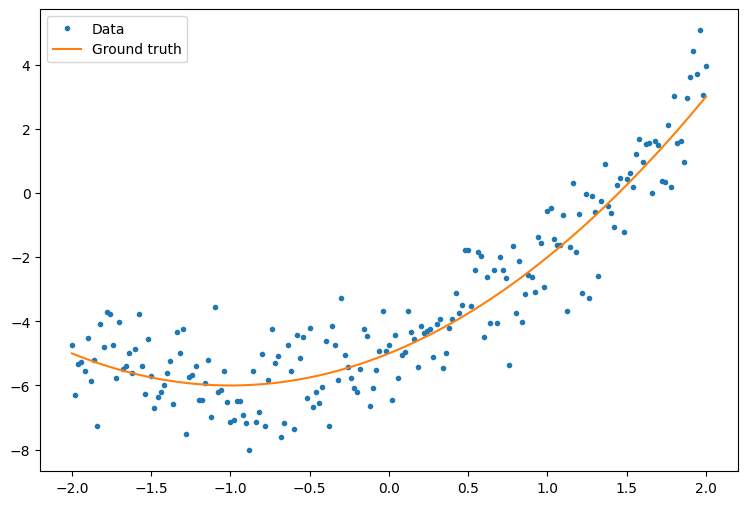

In [33]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
    y = x**2 + 2*x - 5
    return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend();

In [34]:
tf.random.uniform([3,2,4], 0, 10)

<tf.Tensor: shape=(3, 2, 4), dtype=float32, numpy=
array([[[7.574854 , 2.5155377, 2.3961878, 8.95804  ],
        [8.060354 , 6.125958 , 7.671851 , 1.5602195]],

       [[6.2220454, 0.5036402, 5.6178236, 8.836243 ],
        [2.6639867, 3.6372256, 5.7404766, 6.3647747]],

       [[5.7789207, 1.8342578, 1.733371 , 7.060194 ],
        [4.765381 , 2.8735101, 8.80669  , 6.015424 ]]], dtype=float32)>

In [35]:
class Model(tf.Module):
    
    def __init__(self):
        random_init = tf.random.uniform([3], 0, 5, dtype=tf.float32, seed=69)
        self.W_1 = tf.Variable(random_init[0], name='W_1')
        self.W_2 = tf.Variable(random_init[1], name='W_2')
        self.b = tf.Variable(random_init[2], name='b')
        
    def __call__(self, x):
        return self.W_2 * x**2 + self.W_1 * x + self.b

In [36]:
model = Model()

In [37]:
def plot_preds(x, y, f, model, title):
    plt.figure()
    plt.plot(x, y, '.', label='Data')
    plt.plot(x, f(x), label='Ground truth')
    plt.plot(x, model(x), label='Predictions')
    plt.title(title)
    plt.legend()

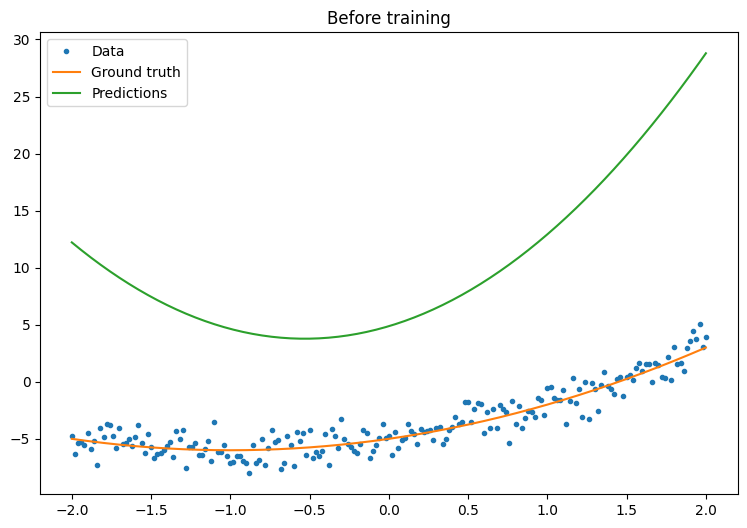

In [38]:
plot_preds(x, y, f, model, 'Before training')

In [39]:
def mse_loss(y_true, y_pred):
    return tf.reduce_mean((y_true - y_pred)**2)

In [40]:
list(tf.data.Dataset.from_tensor_slices((x, y)))

[(<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-4.727105>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.98>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-6.289656>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.96>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-5.328794>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.94>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-5.270585>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.92>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-5.562881>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.9>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-4.510551>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.88>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-5.871786>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.86>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-5.220483>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.84>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-7.260298>),
 (<

In [41]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [42]:
list(dataset)[-1]

(<tf.Tensor: shape=(9,), dtype=float32, numpy=
 array([-0.64, -1.74,  0.04, -0.72, -0.68,  1.12,  0.46, -0.94, -0.28],
       dtype=float32)>,
 <tf.Tensor: shape=(9,), dtype=float32, numpy=
 array([-4.747081 , -4.7302475, -4.4133863, -5.2899475, -7.6029634,
        -3.6665456, -3.48145  , -6.4779353, -5.047057 ], dtype=float32)>)

In [43]:
model.variables

(<tf.Variable 'W_1:0' shape=() dtype=float32, numpy=4.1439056>,
 <tf.Variable 'W_2:0' shape=() dtype=float32, numpy=3.9076905>,
 <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.8737946>)

(<tf.Tensor: shape=(), dtype=float32, numpy=1.1052585>, <tf.Tensor: shape=(), dtype=float32, numpy=45.874046>, <tf.Tensor: shape=(), dtype=float32, numpy=26.881008>)

(<tf.Tensor: shape=(), dtype=float32, numpy=18.305914>, <tf.Tensor: shape=(), dtype=float32, numpy=42.733482>, <tf.Tensor: shape=(), dtype=float32, numpy=27.15227>)

(<tf.Tensor: shape=(), dtype=float32, numpy=-3.0532813>, <tf.Tensor: shape=(), dtype=float32, numpy=32.34118>, <tf.Tensor: shape=(), dtype=float32, numpy=22.20856>)

(<tf.Tensor: shape=(), dtype=float32, numpy=2.9197938>, <tf.Tensor: shape=(), dtype=float32, numpy=28.591877>, <tf.Tensor: shape=(), dtype=float32, numpy=21.586458>)

(<tf.Tensor: shape=(), dtype=float32, numpy=1.5305278>, <tf.Tensor: shape=(), dtype=float32, numpy=31.598242>, <tf.Tensor: shape=(), dtype=float32, numpy=21.230606>)

(<tf.Tensor: shape=(), dtype=float32, numpy=7.944242>, <tf.Tensor: shape=(), dtype=float32, numpy=37.658463>, <tf.Tensor: shape=(), dtype=float32, numpy=21.397581>)

(

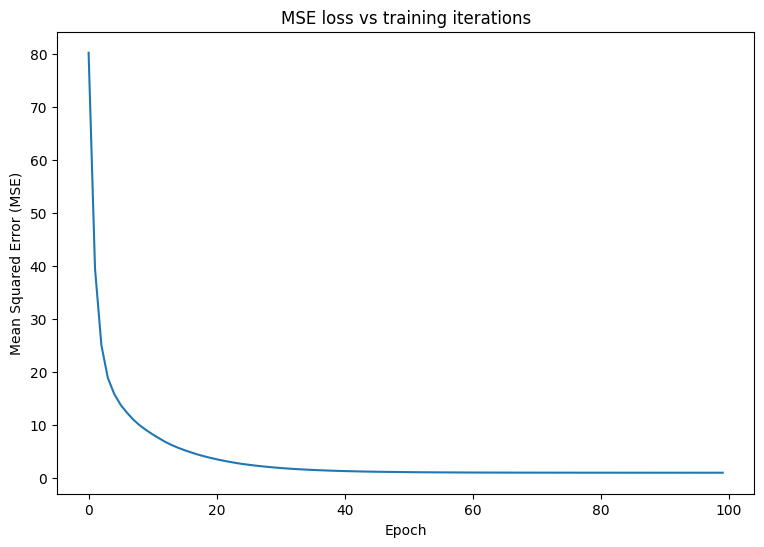

In [44]:
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []

# Format training loop
for epoch in range(epochs):
    for x_batch, y_batch in dataset:
        with tf.GradientTape() as tape:
            batch_loss = mse_loss(model(x_batch), y_batch)
        # Update parameters with respect to the gradient calculations
        grads = tape.gradient(batch_loss, model.variables)
        print(grads,end="\n\n")
        for g,v in zip(grads, model.variables):
            v.assign_sub(learning_rate*g)
    # Keep track of model loss per epoch
    loss = mse_loss(model(x), y)
    losses.append(loss)
    if epoch % 10 == 0:
        print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations');

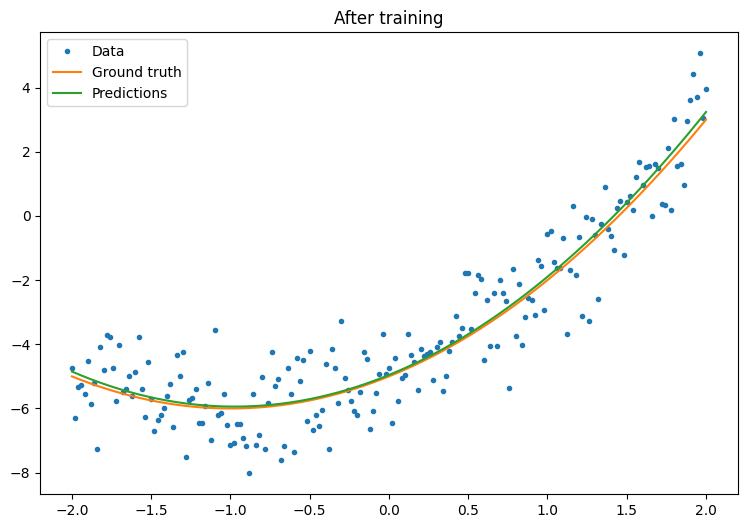

In [45]:
plot_preds(x, y, f, model, 'After training')


In [46]:
x

<tf.Tensor: shape=(201,), dtype=float32, numpy=
array([-2.  , -1.98, -1.96, -1.94, -1.92, -1.9 , -1.88, -1.86, -1.84,
       -1.82, -1.8 , -1.78, -1.76, -1.74, -1.72, -1.7 , -1.68, -1.66,
       -1.64, -1.62, -1.6 , -1.58, -1.56, -1.54, -1.52, -1.5 , -1.48,
       -1.46, -1.44, -1.42, -1.4 , -1.38, -1.36, -1.34, -1.32, -1.3 ,
       -1.28, -1.26, -1.24, -1.22, -1.2 , -1.18, -1.16, -1.14, -1.12,
       -1.1 , -1.08, -1.06, -1.04, -1.02, -1.  , -0.98, -0.96, -0.94,
       -0.92, -0.9 , -0.88, -0.86, -0.84, -0.82, -0.8 , -0.78, -0.76,
       -0.74, -0.72, -0.7 , -0.68, -0.66, -0.64, -0.62, -0.6 , -0.58,
       -0.56, -0.54, -0.52, -0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 ,
       -0.38, -0.36, -0.34, -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22,
       -0.2 , -0.18, -0.16, -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04,
       -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,
        0.16,  0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,
        0.34,  0.36,  0.38,  0.4 ,  0.42, 

In [47]:
np.array(x[:10])

array([-2.  , -1.98, -1.96, -1.94, -1.92, -1.9 , -1.88, -1.86, -1.84,
       -1.82], dtype=float32)

In [48]:
tensor_1 = tf.random.normal(shape=(2, 3, 3, 2))
tensor_2 = tf.random.normal(shape=(2, 3, 2, 4))


In [49]:
tensor_1

<tf.Tensor: shape=(2, 3, 3, 2), dtype=float32, numpy=
array([[[[-1.5430713 ,  0.63391876],
         [-0.31189433, -1.4487908 ],
         [-0.9819331 ,  1.4695954 ]],

        [[ 1.4942557 , -0.6671765 ],
         [ 0.7660322 ,  0.5578379 ],
         [ 0.77341545,  1.03068   ]],

        [[ 0.68735147,  0.9218918 ],
         [ 1.2192019 , -0.90987104],
         [-0.3464345 , -1.2885414 ]]],


       [[[ 1.6446079 ,  0.53505546],
         [ 0.35129416, -0.85805124],
         [-0.4566626 , -1.9165037 ]],

        [[ 1.7540315 ,  1.3715507 ],
         [-0.16517895, -0.34130242],
         [ 0.350135  , -1.4454892 ]],

        [[ 0.5234815 , -1.592088  ],
         [ 0.48026457, -0.49943045],
         [ 1.2428749 ,  0.22887574]]]], dtype=float32)>

In [50]:
tensor_2

<tf.Tensor: shape=(2, 3, 2, 4), dtype=float32, numpy=
array([[[[-0.93043256,  0.9973436 , -0.10196788,  0.53673404],
         [ 0.09131712,  0.0296707 , -0.01833509, -0.09677274]],

        [[ 0.01812445, -0.19503577,  0.45350513,  2.0079246 ],
         [-0.30730072,  0.04668128,  1.2071707 , -0.28216812]],

        [[-1.6818627 ,  1.4065757 , -0.41841972, -0.26822156],
         [-1.7301921 , -1.3209286 ,  1.2013826 , -0.97809875]]],


       [[[ 0.0435969 ,  0.14189692,  0.69492996,  0.50913304],
         [-1.6804554 ,  1.5878141 ,  1.0080428 , -1.7146033 ]],

        [[ 0.6254587 ,  1.3730172 ,  0.91100395,  0.5112079 ],
         [-0.08806235, -1.931956  , -0.44497332,  0.3738041 ]],

        [[-1.4415182 , -0.8408613 ,  0.1850991 ,  1.4785514 ],
         [-1.1735915 , -0.53999555,  1.0684233 ,  1.3132429 ]]]],
      dtype=float32)>

In [51]:

tensor_1 @ tensor_2

<tf.Tensor: shape=(2, 3, 3, 4), dtype=float32, numpy=
array([[[[ 1.49361145e+00, -1.52016342e+00,  1.45720750e-01,
          -8.89564931e-01],
         [ 1.57897234e-01, -3.54052454e-01,  5.83669096e-02,
          -2.72008628e-02],
         [ 1.04782176e+00, -9.35720801e-01,  7.31804743e-02,
          -6.69253707e-01]],

        [[ 2.32106373e-01, -3.22577953e-01, -1.27743304e-01,
           3.18860865e+00],
         [-1.57540068e-01, -1.23363100e-01,  1.02080512e+00,
           1.38073087e+00],
         [-3.02710950e-01, -1.02730215e-01,  1.59495449e+00,
           1.26213491e+00]],

        [[-2.75108051e+00, -2.50941455e-01,  8.19943368e-01,
          -1.08606374e+00],
         [-4.76278543e-01,  2.91677427e+00, -1.60324144e+00,
           5.62927485e-01],
         [ 2.81207943e+00,  1.21478486e+00, -1.40307629e+00,
           1.35324204e+00]]],


       [[[-8.27437043e-01,  1.08293343e+00,  1.68224621e+00,
          -8.00836682e-02],
         [ 1.45723212e+00, -1.31257820e+00, -6.2

In [52]:
c = tf.constant([[4.0, 1.0], [10.0, 5.0]])
c

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 4.,  1.],
       [10.,  5.]], dtype=float32)>

In [53]:

# Find the largest value
print(tf.reduce_max(c))
# Find the index of the largest value
print(tf.math.argmax(c))
# Compute the softmax
print(tf.nn.softmax(c))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 1], shape=(2,), dtype=int64)
tf.Tensor(
[[0.95257413 0.04742588]
 [0.9933072  0.00669285]], shape=(2, 2), dtype=float32)


In [54]:
type(c.shape)

tensorflow.python.framework.tensor_shape.TensorShape

In [55]:
tf.convert_to_tensor(c.shape)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 2])>

In [56]:
tf.size(x).numpy()

201

In [57]:
tf.shape(c)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 2])>

In [58]:
tf.rank(c)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [59]:
t2 = tf.constant([[0, 1, 2, 3, 4],
                    [5, 6, 7, 8, 9],
                    [10, 11, 12, 13, 14],
                    [15, 16, 17, 18, 19]])
t2

<tf.Tensor: shape=(4, 5), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])>

In [60]:
test = tf.random.uniform((4,2,3,2))
test

<tf.Tensor: shape=(4, 2, 3, 2), dtype=float32, numpy=
array([[[[0.02659631, 0.7220036 ],
         [0.7165477 , 0.7148832 ],
         [0.9481995 , 0.73631275]],

        [[0.9025967 , 0.08151293],
         [0.42447996, 0.5297668 ],
         [0.32545054, 0.6695218 ]]],


       [[[0.06683934, 0.04814267],
         [0.33754325, 0.13187945],
         [0.20473981, 0.8464159 ]],

        [[0.17984498, 0.87240314],
         [0.26472592, 0.607679  ],
         [0.7543136 , 0.41618562]]],


       [[[0.98169625, 0.908777  ],
         [0.6563232 , 0.84028554],
         [0.5995959 , 0.271837  ]],

        [[0.3653792 , 0.80308604],
         [0.2801082 , 0.46784544],
         [0.3492217 , 0.05900037]]],


       [[[0.9113442 , 0.9045634 ],
         [0.60716903, 0.7562195 ],
         [0.04432464, 0.5869651 ]],

        [[0.07295012, 0.8567903 ],
         [0.05860937, 0.54332733],
         [0.97786784, 0.35404348]]]], dtype=float32)>

In [61]:
tf.reshape(test, (48,1))

<tf.Tensor: shape=(48, 1), dtype=float32, numpy=
array([[0.02659631],
       [0.7220036 ],
       [0.7165477 ],
       [0.7148832 ],
       [0.9481995 ],
       [0.73631275],
       [0.9025967 ],
       [0.08151293],
       [0.42447996],
       [0.5297668 ],
       [0.32545054],
       [0.6695218 ],
       [0.06683934],
       [0.04814267],
       [0.33754325],
       [0.13187945],
       [0.20473981],
       [0.8464159 ],
       [0.17984498],
       [0.87240314],
       [0.26472592],
       [0.607679  ],
       [0.7543136 ],
       [0.41618562],
       [0.98169625],
       [0.908777  ],
       [0.6563232 ],
       [0.84028554],
       [0.5995959 ],
       [0.271837  ],
       [0.3653792 ],
       [0.80308604],
       [0.2801082 ],
       [0.46784544],
       [0.3492217 ],
       [0.05900037],
       [0.9113442 ],
       [0.9045634 ],
       [0.60716903],
       [0.7562195 ],
       [0.04432464],
       [0.5869651 ],
       [0.07295012],
       [0.8567903 ],
       [0.05860937],
      

In [62]:
tf.broadcast_to(tf.random.uniform([1,2]), (4,2,))

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[0.07400775, 0.34476614],
       [0.07400775, 0.34476614],
       [0.07400775, 0.34476614],
       [0.07400775, 0.34476614]], dtype=float32)>

In [63]:
a = tf.Variable([2.0, 3.0])
# Create b based on the value of a
b = tf.Variable(a)
a.assign([5, 6])

# a and b are different
print(a.numpy())
print(b.numpy())

# There are other versions of assign
print(a.assign_add([2,3]).numpy())  # [7. 9.]
print(a.assign_sub([7,9]).numpy())  # [0. 0.]

[5. 6.]
[2. 3.]
[7. 9.]
[0. 0.]


In [64]:
# Uncomment to see where your variables get placed (see below)
tf.debugging.set_log_device_placement(True)

In [65]:
tf.Variable([1.0, 2.0, 3.0]).device

'/job:localhost/replica:0/task:0/device:CPU:0'

In [66]:

devices = tf.config.list_physical_devices()
for device in devices:
    print(device)


PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [67]:
x = tf.Variable([1.0, 2.0, 3.0])
with tf.GradientTape(persistent=True) as tape:
    y0 = x**2
    y1 = (tf.reshape(x, (3,1))) @ tf.reshape(x, (1,3))

print(tape.gradient(y0, x).numpy())
#tape.gradient(y1, x).numpy()
tape.jacobian(y1, x).numpy()

# print(tape.gradient([y0,y1], x))


[2. 4. 6.]


array([[[2., 0., 0.],
        [2., 1., 0.],
        [3., 0., 1.]],

       [[2., 1., 0.],
        [0., 4., 0.],
        [0., 3., 2.]],

       [[3., 0., 1.],
        [0., 3., 2.],
        [0., 0., 6.]]], dtype=float32)

In your case, y1 is a 3x3 matrix and x is a vector of length 3. Therefore, the Jacobian is a 3x3x3 tensor, where the element at position (i, j, k) is the derivative of y1[i, j] with respect to x[k].

Here's how the values are computed:

The first row of the Jacobian for each element of y1 is [2, 0, 0] because y1[0, 0], y1[1, 0], and y1[2, 0] are x[0]**2, x[0] * x[1], and x[0] * x[2] respectively. The derivative of these expressions with respect to x[0] is 2x[0], x[1], and x[2], ...

The second row of the Jacobian for each element of y1 is [2, 1, 0], [0, 4, 0], and [0, 3, 2] because y1[0, 1], y1[1, 1], and y1[2, 1] are x[0] * x[1], x[1]**2, and x[1] * x[2] respectively. The derivative of these expressions with respect to x[0] is x[1], 2x[1], and x[2], ...

The third row of the Jacobian for each element of y1 is [3, 0, 1], [0, 3, 2], and [0, 0, 6] because y1[0, 2], y1[1, 2], and y1[2, 2] are x[0] * x[2], x[1] * x[2], and x[2]**2 respectively. The derivative of these expressions with respect to x[0] is x[2], 0, and 2x[2], ...

So, the Jacobian of y1 with respect to x is indeed the 3x3x3 tensor you've printed.

In [68]:
tf.reshape(x, (3,1)) @ tf.reshape(x, (1,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [2., 4., 6.],
       [3., 6., 9.]], dtype=float32)>

In [69]:
x = tf.Variable(2.)

with tf.GradientTape(persistent=True) as tape:
    y = x * [3., 4.]
    print(y)

print(tape.gradient(y, x).numpy())
print(tape.jacobian(y, x).numpy())

tf.Tensor([6. 8.], shape=(2,), dtype=float32)
7.0
[3. 4.]


In [70]:
x = tf.linspace(-10.0, 10.0, 200+1)
x

<tf.Tensor: shape=(201,), dtype=float32, numpy=
array([-10.        ,  -9.9       ,  -9.8       ,  -9.7       ,
        -9.6       ,  -9.5       ,  -9.4       ,  -9.3       ,
        -9.2       ,  -9.1       ,  -9.        ,  -8.9       ,
        -8.8       ,  -8.7       ,  -8.6       ,  -8.5       ,
        -8.4       ,  -8.3       ,  -8.2       ,  -8.1       ,
        -8.        ,  -7.8999996 ,  -7.8       ,  -7.7       ,
        -7.6       ,  -7.5       ,  -7.3999996 ,  -7.3       ,
        -7.2       ,  -7.1       ,  -7.        ,  -6.8999996 ,
        -6.8       ,  -6.7       ,  -6.6       ,  -6.5       ,
        -6.3999996 ,  -6.3       ,  -6.2       ,  -6.1       ,
        -6.        ,  -5.9       ,  -5.7999997 ,  -5.7       ,
        -5.6       ,  -5.5       ,  -5.4       ,  -5.2999997 ,
        -5.2       ,  -5.1       ,  -5.        ,  -4.9       ,
        -4.7999997 ,  -4.7       ,  -4.6       ,  -4.5       ,
        -4.4       ,  -4.2999997 ,  -4.2       ,  -4.1       ,
       

In [71]:

with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.nn.sigmoid(x)

dy_dx = tape.gradient(y, x)
dy_dx

<tf.Tensor: shape=(201,), dtype=float32, numpy=
array([4.53958055e-05, 5.01696668e-05, 5.54454418e-05, 6.12759977e-05,
       6.77195421e-05, 7.48406237e-05, 8.27104086e-05, 9.14074990e-05,
       1.01019003e-04, 1.11640831e-04, 1.23379359e-04, 1.36351780e-04,
       1.50687614e-04, 1.66530372e-04, 1.84037970e-04, 2.03385585e-04,
       2.24766336e-04, 2.48393306e-04, 2.74502818e-04, 3.03354871e-04,
       3.35237681e-04, 3.70468944e-04, 4.09399363e-04, 4.52417444e-04,
       4.99951013e-04, 5.52473008e-04, 6.10506395e-04, 6.74626906e-04,
       7.45472440e-04, 8.23745097e-04, 9.10221192e-04, 1.00575748e-03,
       1.11129810e-03, 1.22788746e-03, 1.35667447e-03, 1.49892876e-03,
       1.65605021e-03, 1.82957889e-03, 2.02121888e-03, 2.23284075e-03,
       2.46650935e-03, 2.72449688e-03, 3.00930650e-03, 3.32368701e-03,
       3.67066660e-03, 4.05357219e-03, 4.47605597e-03, 4.94213402e-03,
       5.45620080e-03, 6.02308102e-03, 6.64805667e-03, 7.33690662e-03,
       8.09594616e-03, 8.9320

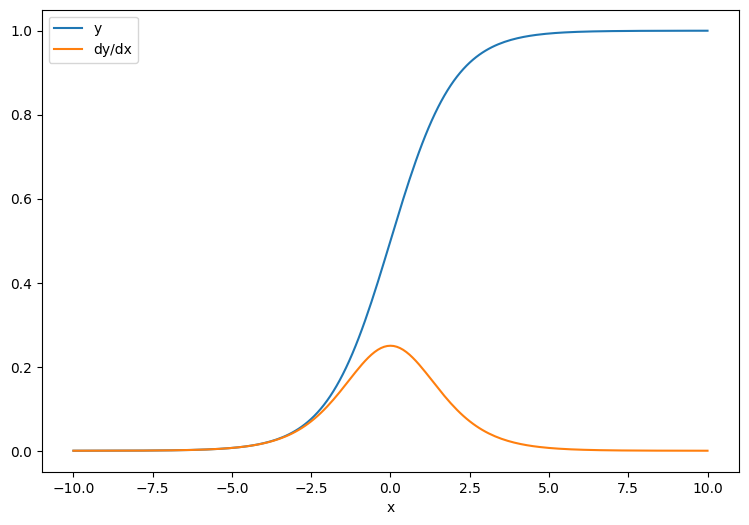

In [72]:
plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.legend()
_ = plt.xlabel('x')

In [73]:
x = tf.constant(3.0)

v0 = tf.Variable(2.0)
v1 = tf.Variable(2.0)

with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    if x > 0.0:
        result = v0 
    else: 
        result = v1**2 *x

dv0, dv1,dvx = tape.gradient(result, [v0, v1,x])

print(dv0)
print(dv1)
print(dvx)


tf.Tensor(1.0, shape=(), dtype=float32)
None
None


In [74]:
x = tf.Variable(2.0)

for epoch in range(2):
  with tf.GradientTape() as tape:
    y = x+1

  print(type(x).__name__, ":", tape.gradient(y, x))
  x = x + 1   # This should be `x.assign_add(1)`

ResourceVariable : tf.Tensor(1.0, shape=(), dtype=float32)
EagerTensor : None


In [75]:
x = tf.Variable([[1.0, 2.0],
                 [3.0, 4.0]], dtype=tf.float32)

with tf.GradientTape() as tape:
  x2 = x**2

  # This step is calculated with NumPy
  y = tf.reduce_mean(x2, axis=0)

  # Like most ops, reduce_mean will cast the NumPy array to a constant tensor
  # using `tf.convert_to_tensor`.
  y = tf.reduce_mean(y, axis=0)

print(tape.gradient(y, x))

tf.Tensor(
[[0.5 1. ]
 [1.5 2. ]], shape=(2, 2), dtype=float32)


In [76]:
np.mean(x2, axis=0)

array([ 5., 10.], dtype=float32)

In [77]:
tf.reduce_mean(np.mean(x2, axis=0), axis=0)

<tf.Tensor: shape=(), dtype=float32, numpy=7.5>

In [78]:
x**2

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.,  4.],
       [ 9., 16.]], dtype=float32)>

In [79]:
a

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [80]:
x+a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [81]:
x0 = tf.Variable(5.0)
x1 = tf.Variable(1.0)

with tf.GradientTape() as tape:
    x3 = x1+x0+x1
#   x1.assign_add(x0)
  # The tape starts recording from x1.
    y = x3**2   # y = (x1 + x0)**2

# This doesn't work.
print(tape.gradient(y, x1))   #dy/dx0 = 2*(x1 + x0)
print(tape.watched_variables())

tf.Tensor(28.0, shape=(), dtype=float32)
(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>)


In [82]:
class TestTFModule(tf.Module):
    def __init__(self, name):
        super().__init__(name=name)
        self.v0 = tf.Variable(1.0)
        self.v1 = tf.Variable(1.0, trainable=False)
    
    
    def __call__(self, x):
        return self.v0 * x + self.v1

In [83]:
m = TestTFModule('G')
m(tf.Variable(np.arange(1,10).astype(np.float32)))



<tf.Tensor: shape=(9,), dtype=float32, numpy=array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=float32)>

In [84]:
print(m.trainable_variables)
print(m.variables)

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,)
(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>)


In [110]:
class DenseLayer(tf.Module): 
    def __init__(self, out_dim, name):
        super().__init__(name=name)
        self.is_initialized = False
        self._out_dim = out_dim
        
    def __call__(self, x):
        if not self.is_initialized:
            self.W = tf.Variable(tf.random.normal((x.shape[-1], self._out_dim)), name=f'{self.name}_' + 'W')
            self.b = tf.Variable(tf.zeros((self._out_dim,)), name=f'{self.name}_'+'b')
            self.is_initialized = True     
        lin_res = tf.matmul(x, self.W) + self.b
        relu_activated = tf.nn.relu(lin_res)
        return relu_activated
        

In [111]:
from typing import Any

class SequentialLayer(tf.Module):
    def __init__(self, name=None, layers:list[DenseLayer]|None=None):
        super().__init__(name=name)
        self.layers = layers if layers is not None else []
    
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
        

In [133]:
seq = SequentialLayer(layers=[DenseLayer(3, 'L1'), DenseLayer(1, 'L2')])
x = tf.random.normal((2,3), seed=69)
print(x)
with tf.GradientTape() as tape:
    y = seq(x)
    
print('seq(x)',seq(x), end='\n')
tape.gradient(y, seq.trainable_variables)

tf.Tensor(
[[ 0.3123532   0.36518288  0.7278571 ]
 [-0.6753013   1.3298657  -0.97459507]], shape=(2, 3), dtype=float32)
seq(x) tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


(<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>,
 <tf.Tensor: shape=(3, 1), dtype=float32, numpy=
 array([[0.],
        [0.],
        [0.]], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>)

In [137]:
seq.trainable_variables

(<tf.Variable 'L1_W:0' shape=(3, 3) dtype=float32, numpy=
 array([[ 1.221811  , -1.2626694 ,  0.51721454],
        [-0.09649384, -0.45591587, -0.37499148],
        [-0.8518625 ,  0.79417574,  0.36546147]], dtype=float32)>,
 <tf.Variable 'L1_b:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>,
 <tf.Variable 'L2_W:0' shape=(3, 1) dtype=float32, numpy=
 array([[ 0.39101645],
        [ 0.7269956 ],
        [-0.01815502]], dtype=float32)>,
 <tf.Variable 'L2_b:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>)

In [121]:
# chkp_path = "my_checkpoint"
# checkpoint = tf.train.Checkpoint(model=seq)
# checkpoint.write(chkp_path)

'my_checkpoint'

In [122]:
# tf.train.list_variables(chkp_path)

[('_CHECKPOINTABLE_OBJECT_GRAPH', []),
 ('model/layers/0/W/.ATTRIBUTES/VARIABLE_VALUE', [3, 3]),
 ('model/layers/0/b/.ATTRIBUTES/VARIABLE_VALUE', [3]),
 ('model/layers/1/W/.ATTRIBUTES/VARIABLE_VALUE', [3, 1]),
 ('model/layers/1/b/.ATTRIBUTES/VARIABLE_VALUE', [1])]

In [135]:
checkpoint = tf.train.Checkpoint(model=seq)
checkpoint.restore('my_checkpoint')

In [136]:
seq.variables

(<tf.Variable 'L1_W:0' shape=(3, 3) dtype=float32, numpy=
 array([[ 1.221811  , -1.2626694 ,  0.51721454],
        [-0.09649384, -0.45591587, -0.37499148],
        [-0.8518625 ,  0.79417574,  0.36546147]], dtype=float32)>,
 <tf.Variable 'L1_b:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>,
 <tf.Variable 'L2_W:0' shape=(3, 1) dtype=float32, numpy=
 array([[ 0.39101645],
        [ 0.7269956 ],
        [-0.01815502]], dtype=float32)>,
 <tf.Variable 'L2_b:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>)

In [138]:
tf.saved_model.save(seq, 'my_model')

INFO:tensorflow:Assets written to: my_model\assets


In [139]:
seq.submodules

(<__main__.DenseLayer at 0x18fb69e0be0>,
 <__main__.DenseLayer at 0x18fb69e0880>)

In [150]:
class KerasGDense(tf.keras.layers.Layer):
    def __init__(self, out_dim, name):
        super().__init__(name=name)
        self._out_dim = out_dim
        
    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], self._out_dim), 
                                 initializer='random_normal', 
                                 trainable=True, name=f'{self.name}_' + 'W')
        self.b = self.add_weight(shape=(self._out_dim,), 
                                 initializer='zeros', 
                                 trainable=True, name=f'{self.name}_' + 'b')
        
    def call(self, inputs: tf.Tensor, *args, **kwargs):
        lin_res = tf.matmul(inputs, self.W) + self.b
        relu_activated = tf.nn.relu(lin_res)
        return relu_activated

In [151]:
class KerasGSeqModel(tf.keras.models.Model):
    def __init__(self, name=None, layers:list[KerasGDense]|None=None):
        super().__init__(name=name)
        self._layers = layers if layers is not None else []
    
    def call(self, inputs, *args, **kwargs):
        for layer in self._layers:
            inputs = layer(inputs)
        return inputs

In [156]:
seqG = KerasGSeqModel(layers=[KerasGDense(3, 'L1'), KerasGDense(1, 'L2')])
with tf.GradientTape() as tape:
    y = seqG(x)
grads = tape.gradient(y, seqG.trainable_variables)
print('seqG(x)',seqG(x), end='\n')
print('grads',grads, end='\n')


seqG(x) tf.Tensor(
[[0.00037352]
 [0.        ]], shape=(2, 1), dtype=float32)
grads [<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.        , -0.01657092,  0.02018532],
       [ 0.        , -0.01937363,  0.02359935],
       [ 0.        , -0.03861418,  0.04703659]], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.        , -0.05305187,  0.06462339], dtype=float32)>, <tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.        ],
       [0.00438328],
       [0.00937829]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>]


In [154]:
seqG.variables

[<tf.Variable 'keras_g_seq_model_3/L1/L1_W:0' shape=(3, 3) dtype=float32, numpy=
 array([[-0.06796854, -0.04784372,  0.04806585],
        [-0.01440478, -0.00833392, -0.02262582],
        [-0.1038169 ,  0.03195078, -0.004641  ]], dtype=float32)>,
 <tf.Variable 'keras_g_seq_model_3/L1/L1_b:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>,
 <tf.Variable 'keras_g_seq_model_3/L2/L2_W:0' shape=(3, 1) dtype=float32, numpy=
 array([[-0.01346019],
        [-0.05445735],
        [ 0.05599511]], dtype=float32)>,
 <tf.Variable 'keras_g_seq_model_3/L2/L2_b:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [155]:
seqG.submodules

(<__main__.KerasGDense at 0x18fb9d68a60>,
 <__main__.KerasGDense at 0x18fb9d6bc70>)

In [157]:
import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [161]:
tf.linspace([0.0], [2.0], 5, axis=0)

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[0. ],
       [0.5],
       [1. ],
       [1.5],
       [2. ]], dtype=float32)>

In [162]:
seqG.summary()

Model: "keras_g_seq_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (KerasGDense)            multiple                  12        
                                                                 
 L2 (KerasGDense)            multiple                  4         
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 16 (64.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
